**Title of project: Predicting Spotify’s popular songs using the structure of popular songs in the past two decades**

Spotify is the fastest growing digital music service platform that gives access to millions of songs. Spotify platform not only serves listeners with various subscriptions that allows them to listen to songs of their choice wherever they are on the globe but also presents music artists, record label managers and music distributors financial benefits for using their music on their platform. it is therefore importantant for these financial beneficiaries to concentrate on not only creating music that have a global appeal but also make music that listeners will love to listen to repeatedly. 

This project seeks to help artists, music distributors and record label managers maximize financial benefits from their association with Spotify by building a model that will help predict songs that will generate global appeal and cause them to be streamed repeatedly based on the structure of the song alone. This model will be able to predict marketable songs even before they are released and uploaded onto Spotify. 

The main data source for this project is the Kaggle Spotify 1 million tracks dataset extracted from Kaggle. A supplementary dataset downloaded from https://usafacts.org/data/topics/economy/economic-indicators/gdp/gross-domestic-product/ on the annual GDP of the United States from 1929 to 2023 will also be used.This supplemetary data will be used to determine if the economy of the country at a time influenced the popularity of particular music genres. With predicted increase in future GDP rates, if there is a determined association between song genres and the economy, the proposed model must be built to predict songs genres that will be popular because of changes in future economic rates. Which makes future GDP rates valuable to building the proposed model.

This project will be successful when a model that predicts the popularity of unreleased songs on Spotify, based on the structure of songs that were popular from the year 2000-2023 is built.

To achieve the goal of this project;
1. Libraries will be imported and files will be loaded.
2. Data extracted from data sources will be cleaned and transformed using numpy and pandas tools together with Python.
3. Clean and transformed data will be analyzed using the same tools. Dataset will be analyzed to detect trends and correlations between features.   Additionally, data visualization tools such as matplotlib and seaborn will be used to visualize results of the analysis.
4.The next stage of the project will be to utilize these trends as a base  to build the proposed prediction model. Open access libraries from sklearn which offers algorithms and tools for preprocessing, regression and model selection will be employed in building the proposed predictive model.


 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading file of interest

Spotify = pd.read_csv("spotify_data.csv")
Spotify.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [3]:
# loading Supplementary dataset
gdp_data = pd.read_csv("gross_domestic_product_usafacts.csv")

In [4]:
#checking supplementary dataset
gdp_data.head()

,Years,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Gross domestic product ($),1.046E+11,92200000000,77400000000,59500000000,57200000000,66800000000,74200000000,8.480000e+10,9.300000e+10,...,1.760810e+13,1.829500e+13,1.880490e+13,1.961210e+13,2.065650e+13,2.152140e+13,2.132300e+13,2.359400e+13,2.574410e+13,2.735640e+13
1,By type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Private industries ($),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.527930e+13,1.586660e+13,1.631090e+13,1.715630e+13,1.809780e+13,1.888910e+13,1.861220e+13,2.078480e+13,2.280750e+13,NaN
3,By industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Agriculture, forestry, fishing...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.989000e+11,1.801000e+11,1.658000e+11,1.768000e+11,1.771000e+11,1.620000e+11,1.608000e+11,2.257000e+11,2.708000e+11,NaN


In [5]:
# Cleaning Spotify fdataset
# Choosing columns of interest from main dataset

Spotify = Spotify[['genre','year','track_name','popularity','danceability','loudness','acousticness','instrumentalness','liveness','tempo','duration_ms']]
Spotify.head(5)

,genre,year,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms
0,acoustic,2012,I Won't Give Up,68,0.483,-10.058,0.6940,0.000000,0.1150,133.406,240166
1,acoustic,2012,93 Million Miles,50,0.572,-10.286,0.4770,0.000014,0.0974,140.182,216387
2,acoustic,2012,Do Not Let Me Go,57,0.409,-13.711,0.3380,0.000050,0.0895,139.832,158960
3,acoustic,2012,Fast Car,58,0.392,-9.845,0.8070,0.000000,0.0797,204.961,304293
4,acoustic,2012,Sky's Still Blue,54,0.430,-5.419,0.0726,0.019300,0.1100,171.864,244320


In [6]:
# Initial shape of dataset

Spotify.shape

(1159764, 11)

In [7]:
#Investigating if values of variables are stored in the appropriate data type or there are errors

Spotify.dtypes

genre                object
year                  int64
track_name           object
popularity            int64
danceability        float64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
tempo               float64
duration_ms           int64
dtype: object

In [8]:
Spotify = Spotify.sort_values(by='year')

In [9]:
# Identifying unique values in popularity column

Spotify['popularity'].unique()

array([ 37,   0,   1,  13,  18,  12,  11,   7,   3,   4,   2,  16,   5,
        21,   6,   8,  17,  22,  29,  23,   9,  10,  31,  70,  65,  68,
        20,  15,  14,  47,  48,  39,  38,  30,  19,  33,  36,  34,  35,
        25,  69,  24,  26,  28,  27,  32,  51,  52,  53,  44,  41,  40,
        46,  43,  45,  62,  54,  55,  49,  57,  42,  72,  71,  64,  56,
        60,  50,  58,  67,  59,  61,  63,  66,  86,  80,  82,  73,  77,
        74,  76,  75,  78,  79,  84,  87,  81,  90,  85,  83,  91,  88,
        93,  89,  94,  92, 100,  95,  96], dtype=int64)

In [10]:
# Reseting and naming index of Spotify dataset

Spotify. reset_index(inplace= True)
Spotify_dropped= Spotify.drop(columns=['index'],axis=1)
Spotify = Spotify_dropped
Spotify.index.name= 'S_index'
Spotify.head()


,genre,year,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms
S_index,,,,,,,,,,,
0,acoustic,2000,Easy Tonight,37,0.470,-8.018,0.259,0.000000,0.2040,84.843,246600
1,opera,2000,"Blumenlieder, Op. 500: No. 7, Herbstzeitlosen",0,0.258,-29.012,0.991,0.001190,0.0790,89.835,157920
2,opera,2000,"Blumenlieder, Op. 500: No. 15, Feuernelken",0,0.432,-26.235,0.989,0.002200,0.0618,136.726,193187
3,opera,2000,Die Gräfin Mariza: Einmal möchte ich wieder ta...,0,0.327,-14.306,0.963,0.000832,0.0888,97.870,208040
4,opera,2000,"Blumenlieder, Op. 500: No. 12, Anemonen",0,0.385,-24.274,0.992,0.002490,0.0712,83.645,169893


In [11]:
# Cleaning supplementary dataset:GDP dataset
# Dropping NaN values in GDP dataset
gdp_data= gdp_data.dropna()
gdp_data.head()

,Years,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Gross domestic product ($),1.046E+11,92200000000,77400000000,59500000000,57200000000,66800000000,74200000000,8.480000e+10,9.300000e+10,...,1.760810e+13,1.829500e+13,1.880490e+13,1.961210e+13,2.065650e+13,2.152140e+13,2.132300e+13,2.359400e+13,2.574410e+13,2.735640e+13
124,Personal consumption expenditures ($),77400000000,70100000000,60700000000,48700000000,45900000000,51500000000,55900000000,6.220000e+10,6.680000e+10,...,1.187450e+13,1.229740e+13,1.272680e+13,1.329060e+13,1.393440e+13,1.441760e+13,1.420620e+13,1.604300e+13,1.751170e+13,1.856400e+13
126,Goods ($),43800000000,38200000000,31700000000,24100000000,23800000000,28500000000,31600000000,3.600000e+10,3.840000e+10,...,3.886600e+12,3.955100e+12,4.033000e+12,4.212200e+12,4.414200e+12,4.529200e+12,4.713100e+12,5.506600e+12,5.997000e+12,6.192700e+12
128,Durable goods ($),9800000000,7700000000,5900000000,4000000000,3800000000,4600000000,5500000000,6.700000e+09,7.400000e+09,...,1.247300e+12,1.315800e+12,1.356500e+12,1.415900e+12,1.488800e+12,1.522700e+12,1.628900e+12,2.006400e+12,2.128900e+12,2.200700e+12
129,Nondurable goods ($),33900000000,30500000000,25800000000,20200000000,20000000000,23900000000,26100000000,2.920000e+10,3.100000e+10,...,2.639300e+12,2.639300e+12,2.676500e+12,2.796300e+12,2.925400e+12,3.006500e+12,3.084200e+12,3.500200e+12,3.868100e+12,3.992000e+12


In [12]:
# Narrowing to needed data in GDP dataset

use_gdp = gdp_data.head(1)
use_gdp

,Years,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Gross domestic product ($),1.046E+11,92200000000,77400000000,59500000000,57200000000,66800000000,74200000000,8.480000e+10,9.300000e+10,...,1.760810e+13,1.829500e+13,1.880490e+13,1.961210e+13,2.065650e+13,2.152140e+13,2.132300e+13,2.359400e+13,2.574410e+13,2.735640e+13


In [13]:
#Transposing data in GDP dataset

use_gdp = use_gdp.T
use_gdp

,0
Years,Gross domestic product ($)
1929,1.046E+11
1930,92200000000
1931,77400000000
1932,59500000000
...,...
2019,21521400000000.0
2020,21323000000000.0
2021,23594000000000.0
2022,25744100000000.0


In [14]:
# Reseting index 

use_gdp.reset_index(inplace=True)
use_gdp.head()

,index,0
0,Years,Gross domestic product ($)
1,1929,1.046E+11
2,1930,92200000000
3,1931,77400000000
4,1932,59500000000


In [15]:
# Renaming columns

Gdp= use_gdp.rename(columns= {'index':'year',0:'GDP'})
Gdp

,year,GDP
0,Years,Gross domestic product ($)
1,1929,1.046E+11
2,1930,92200000000
3,1931,77400000000
4,1932,59500000000
...,...,...
91,2019,21521400000000.0
92,2020,21323000000000.0
93,2021,23594000000000.0
94,2022,25744100000000.0


In [16]:
# Dropping first row

Gdp= Gdp.drop(0)
Gdp

,year,GDP
1,1929,1.046E+11
2,1930,92200000000
3,1931,77400000000
4,1932,59500000000
5,1933,57200000000
...,...,...
91,2019,21521400000000.0
92,2020,21323000000000.0
93,2021,23594000000000.0
94,2022,25744100000000.0


In [17]:
# Subsetting df to get data of interest in this case, GDP from the year 2000-2023

final_Gdp= Gdp[Gdp['year']>='2000']
final_Gdp.reset_index(inplace=True)
final_Gdp_dropped = final_Gdp.drop(columns=['index'],axis=1)
final_Gdp= final_Gdp_dropped

#Renaming index

final_Gdp.index.name='f_index'
final_Gdp.head()

,year,GDP
f_index,,
0,2000,10252300000000.0
1,2001,10581800000000.0
2,2002,10936400000000.0
3,2003,11458200000000.0
4,2004,12213700000000.0


In [18]:
# Merging supplementary dataset to main dataset

Merged_df = Spotify.merge(final_Gdp, how='left', left_on= 'S_index', right_on='f_index')
renamed = Merged_df.rename(columns={'year_x' :'year','year_y':'GDP_year'})
Merged_df= renamed
Merged_df.head()

,genre,year,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms,GDP_year,GDP
0,acoustic,2000,Easy Tonight,37,0.470,-8.018,0.259,0.000000,0.2040,84.843,246600,2000,10252300000000.0
1,opera,2000,"Blumenlieder, Op. 500: No. 7, Herbstzeitlosen",0,0.258,-29.012,0.991,0.001190,0.0790,89.835,157920,2001,10581800000000.0
2,opera,2000,"Blumenlieder, Op. 500: No. 15, Feuernelken",0,0.432,-26.235,0.989,0.002200,0.0618,136.726,193187,2002,10936400000000.0
3,opera,2000,Die Gräfin Mariza: Einmal möchte ich wieder ta...,0,0.327,-14.306,0.963,0.000832,0.0888,97.870,208040,2003,11458200000000.0
4,opera,2000,"Blumenlieder, Op. 500: No. 12, Anemonen",0,0.385,-24.274,0.992,0.002490,0.0712,83.645,169893,2004,12213700000000.0


The cleaned data from both dataframes is saved as Merged_df

EDA

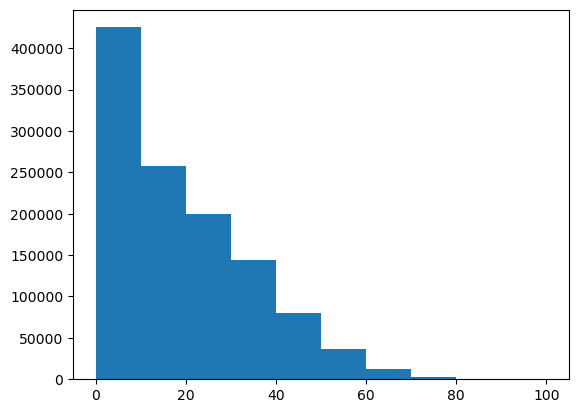

In [19]:
# Choosing the dependent variable

plt.hist(Merged_df['popularity'],bins= 10)
plt.show()

In [20]:
# Getting a statistical summary of dependent variable

Merged_df['popularity'].describe()

count    1.159764e+06
mean     1.838312e+01
std      1.588554e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      2.900000e+01
max      1.000000e+02
Name: popularity, dtype: float64

In [21]:
Merged_df['popularity'].unique()

array([ 37,   0,   1,  13,  18,  12,  11,   7,   3,   4,   2,  16,   5,
        21,   6,   8,  17,  22,  29,  23,   9,  10,  31,  70,  65,  68,
        20,  15,  14,  47,  48,  39,  38,  30,  19,  33,  36,  34,  35,
        25,  69,  24,  26,  28,  27,  32,  51,  52,  53,  44,  41,  40,
        46,  43,  45,  62,  54,  55,  49,  57,  42,  72,  71,  64,  56,
        60,  50,  58,  67,  59,  61,  63,  66,  86,  80,  82,  73,  77,
        74,  76,  75,  78,  79,  84,  87,  81,  90,  85,  83,  91,  88,
        93,  89,  94,  92, 100,  95,  96], dtype=int64)

In [22]:
# Checking the number of occurences of dependent values

Merged_df['popularity'].value_counts()

popularity
0      158391
1       39820
2       31247
8       30322
9       29249
        ...  
93          3
94          1
100         1
95          1
96          1
Name: count, Length: 98, dtype: int64

The popularity column ranks popularity songs from 0-100. Looks like most of the of the songs in the dataset were not popular.

In [23]:
Merged_df['genre'].unique()

array(['acoustic', 'opera', 'party', 'piano', 'pop', 'new-age',
       'minimal-techno', 'metalcore', 'progressive-house', 'psych-rock',
       'power-pop', 'punk', 'pop-film', 'house', 'indian', 'hip-hop',
       'hardcore', 'hard-rock', 'hardstyle', 'heavy-metal', 'k-pop',
       'jazz', 'metal', 'indie-pop', 'industrial', 'soul', 'spanish',
       'sleep', 'punk-rock', 'samba', 'sertanejo', 'salsa', 'rock-n-roll',
       'romance', 'groove', 'guitar', 'grindcore', 'goth', 'ska',
       'show-tunes', 'singer-songwriter', 'techno', 'trance', 'tango',
       'trip-hop', 'swedish', 'sad', 'rock', 'dub', 'electronic', 'emo',
       'folk', 'forro', 'dubstep', 'edm', 'electro', 'dancehall',
       'death-metal', 'country', 'dance', 'drum-and-bass', 'disco',
       'german', 'garage', 'gospel', 'french', 'funk', 'afrobeat',
       'alt-rock', 'ambient', 'cantopop', 'club', 'comedy', 'classical',
       'chill', 'black-metal', 'blues', 'deep-house', 'detroit-techno',
       'breakbeat', 'ch

In [24]:
# Finding the most listed genre in the Spotify dataset

Merged_df['genre'].value_counts()

genre
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: count, Length: 82, dtype: int64

In [87]:
# Calculating the average popularity by genre

avg_pop = Merged_df.groupby('genre')['popularity'].mean()
avg_pop.head(10)

genre
acoustic         17.825094
afrobeat          8.559984
alt-rock         38.596807
ambient          20.008743
black-metal      11.089969
blues            21.620059
breakbeat         4.203166
cantopop         12.634185
chicago-house     3.260542
chill            25.905162
Name: popularity, dtype: float64

<Axes: title={'center': 'Mean genre popularity'}, xlabel='popularity', ylabel='genre'>

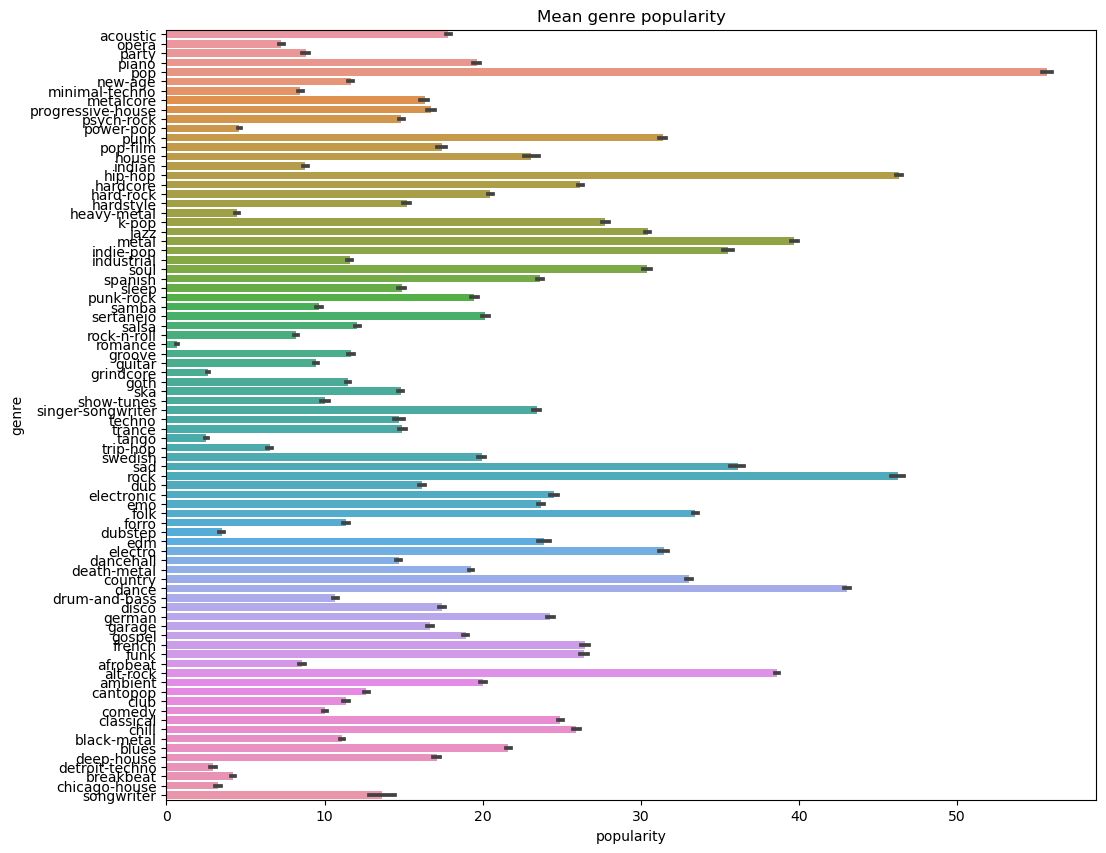

In [91]:
# Viewing the average popularity by genre

fig,ax = plt.subplots(figsize= (12, 10))
plt.title('Mean genre popularity')
plt.xlabel('Average popularity')
sns.barplot(x='popularity', y='genre', data= Merged_df)


Looks like the most popular music genre over the last two decades is pop.

In [26]:
# Viewing the correlation between the the dependent variable and othe features
# dropping the genre and track_name columns 

drop_cols = Merged_df.drop(columns= ['genre','track_name'], axis =1)
drop_cols.head()

,year,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms,GDP_year,GDP
0,2000,37,0.470,-8.018,0.259,0.000000,0.2040,84.843,246600,2000,10252300000000.0
1,2000,0,0.258,-29.012,0.991,0.001190,0.0790,89.835,157920,2001,10581800000000.0
2,2000,0,0.432,-26.235,0.989,0.002200,0.0618,136.726,193187,2002,10936400000000.0
3,2000,0,0.327,-14.306,0.963,0.000832,0.0888,97.870,208040,2003,11458200000000.0
4,2000,0,0.385,-24.274,0.992,0.002490,0.0712,83.645,169893,2004,12213700000000.0


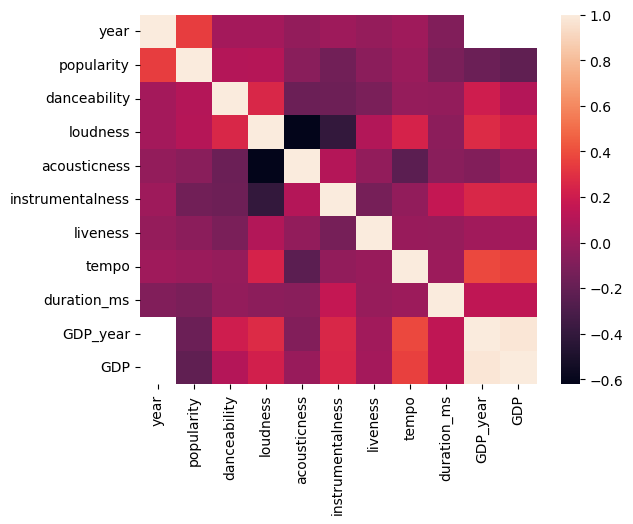

In [27]:
corr = drop_cols.corr()
sns.heatmap(corr)
plt.show()

From the heatmap popularity :
1. is not correlated to acousticness,liveness and tempo 
2. is weakly correlated (0.2) to danceability and loudness.
3. is negatively corelated(-0.2) to instrumentalness, duration_ms, GDP_year and GDP
4. is strongly correlated to year(0.4)


<Axes: title={'center': 'Annual GDP from 2000-2023'}, xlabel='GDP_year', ylabel='GDP'>

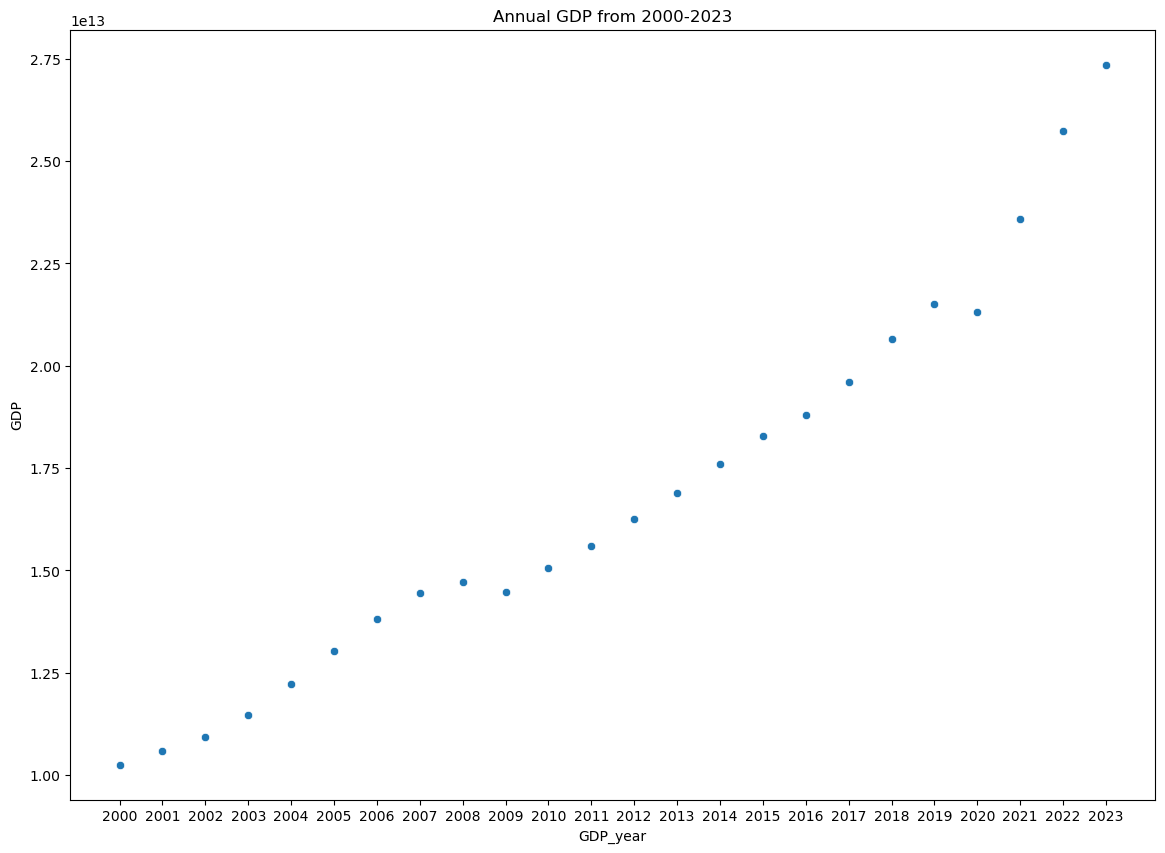

In [28]:
# Viewing the annual GDP rates over the last two decades from GDP dataset

fig, ax= plt.subplots(figsize=(14,10))
plt.title('Annual GDP from 2000-2023')
sns.scatterplot(x= 'GDP_year', y= 'GDP', data= Merged_df)

#looks like there was a drop in GDP in 2008, 2020 and a sharp increase in 2021

<Axes: title={'center': 'Genre popularity from 2000-2023'}, xlabel='year', ylabel='genre'>

C:\Users\sonia\Downloads\soniaanacoda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\sonia\Downloads\soniaanacoda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


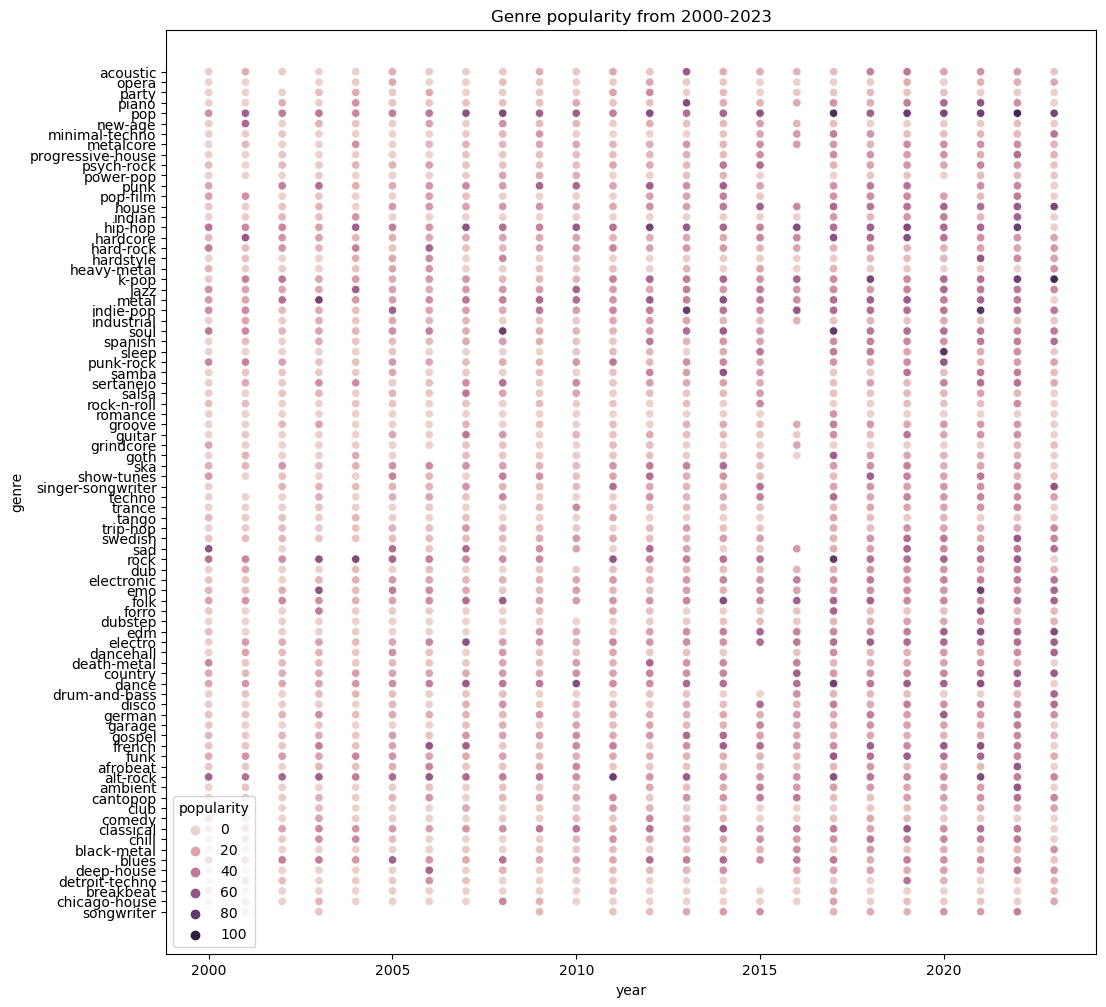

In [34]:
# Viewing the popularity of genre over the years. 

fig, ax= plt.subplots(figsize=(12,12))
plt.title('Genre popularity from 2000-2023')
sns.scatterplot(x= 'year', y= 'genre', data= Spotify, hue= 'popularity')


**SUMMARY**

Pop music was the most popular music even in 2008 and 2020 when the annual GDP had dropped and also in 2021 when GDP rates sharply increased. It is therefore safe to say that pop music has been very popular over the years despite changes in GDP. 

From the Genre popularity chart, it seems the popularity of songs seem to have increased during the years the GDP dropped(as indicated by the heatmap too). The highest rank of music in 2008 was 80 and the highest rank in 2020 was 100. This observed trend maybe because more people listen to 'good' or 'relatable' songs during times of economic hardships. 

The gaps in the Genre popularity chart shows the abscence of song genres. A few missing genres in 2015 and more missing genres (including pop)in 2016. For this reason music genres like hip hop gained popularity in 2016.

Although some genres seem to have gained more popularity in recent years, this project will not delve too much into that because the structure of the songs gives us more clues to what drives musics popularity.

The findings of the heatmap maybe proof that  music popularity is determined by the types of music released in the year under review because listeners will listen to only what is available to them and it is from the this list that the most preferred gains more popularity.

The heatmap also shows that some variables/ features are highly correlated with each other, example:loudness and acousticness; instrumentalness and loudness; tempo and acousticness.

Moving forward this project will explore the music popularities correlations to  danceability ,loudness, instrumentalness, duration_ms and GDP in order to build the proposed predictive model.